In [ ]:
## Continue Data Processing ##

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('C:/Final_project/Final_project/analysis_file/cleaned_data.csv', index_col=0)

In [3]:
df.shape

(1359, 12)

In [4]:
df['quality'] = df['quality'].map({'Non-Quality': 0, 'Quality': 1, })

In [11]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [10]:
df['quality'].value_counts()

quality
1    719
0    640
Name: count, dtype: int64

In [7]:
df.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity',
                    'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar',
                    'chlorides': 'chlorides', 'free sulfur dioxide': 'free_sulfur_dioxide',
                    'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)

In [8]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


Burada bağımlı değişkenimiz "quality" yi, bağımsız değişkenlerimiz olarak diğer sutünları alıyoruz. Bu kimyasal değişkenlerin hepsi şarabın içinde olmak zorunda olduğu için ilk etapta herhangi bir features çıkarmadım. Quality yi kaliteli-kalitesiz olarak ayırdığımız için  durum üzerinden sınıflandırma yapmamız daha uygun. 

Bu modelleri uygulayıp hangisinin iyi sonuç verdiğine baktım.
Logistic Regression (Lojistik Regresyon):
- Basit ve yeterince hızlıdır.
- Veri setinde doğrusal bir sınıflandırma problemi varsa ve featureslar arasındaki ilişkilerin doğrusal olduğunu       düşünüyorsak kullanışlıdır.

Support Vector Classifier (Destek Vektör Sınıflandırıcısı - SVC):
- Veri setinde karmaşık sınırlar varsa  veya yüksek boyutlu özellik uzayları varsa.
- SVM modelleri genellikle iyi genelleme yapar.

Random Forest (Rastgele Orman):
- Çeşitli özellik türleri ve yüksek boyutlu veri setleri için güçlüdür.
- Overfitting'e karşı dayanıklıdır ve otomatik olarak özellik önemini değerlendirir.
K-Nearest Neighbors (KNN):
- Veri setiniz küçük ve sınıflar birbirine yakınsa kullanışlıdır.
- Ancak boyutluluk sorunu nedeniyle yüksek boyutlu veri setlerinde performans sorunları ortaya çıkabilir.

Decision Trees (Karar Ağaçları):
- Basit ve yorumlanabilir bir model arıyorsanız kullanışlıdır.
- Ancak tek başına eğilimli olduğu overfitting sorunuyla başa çıkmak için ensemble yöntemleriyle (örneğin, Random Forest) birleştirilebilir.

In [15]:
X = df.drop(['quality'], axis=1)  # bağımsız değişkenler 
y = df['quality']                 # bağımlı(hedef) değişken

# Modelin başarısını arttırmak ve aşırı etkisi olan verilerin etkisini azaltmak için verilerimizi normalize etmeliyiz.

In [16]:
# Normalize the data
X = preprocessing.StandardScaler().fit(X).transform(X)

# Veri setimizi train ve test olarak bölüyoruz.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1087, 11) (1087,)
Test set: (272, 11) (272,)


# Models

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate and compare models
models = [logreg_model, svc_model, rf_model, knn_model, dt_model]
predictions = [logreg_predictions, svc_predictions, rf_predictions, knn_predictions, dt_predictions]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN', 'Decision Trees']

for model, preds, name in zip(models, predictions, model_names):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    matrix = confusion_matrix(y_test, preds)
    
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    print("\n")

Results for Logistic Regression:
Accuracy: 0.7647
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       124
           1       0.80      0.75      0.78       148

    accuracy                           0.76       272
   macro avg       0.76      0.77      0.76       272
weighted avg       0.77      0.76      0.77       272

Confusion Matrix:
 [[ 97  27]
 [ 37 111]]


Results for SVC:
Accuracy: 0.7831
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       124
           1       0.82      0.76      0.79       148

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.79      0.78      0.78       272

Confusion Matrix:
 [[100  24]
 [ 35 113]]


Results for Random Forest:
Accuracy: 0.7537
Classification Report:
               precision    recall  f1-score   support

   

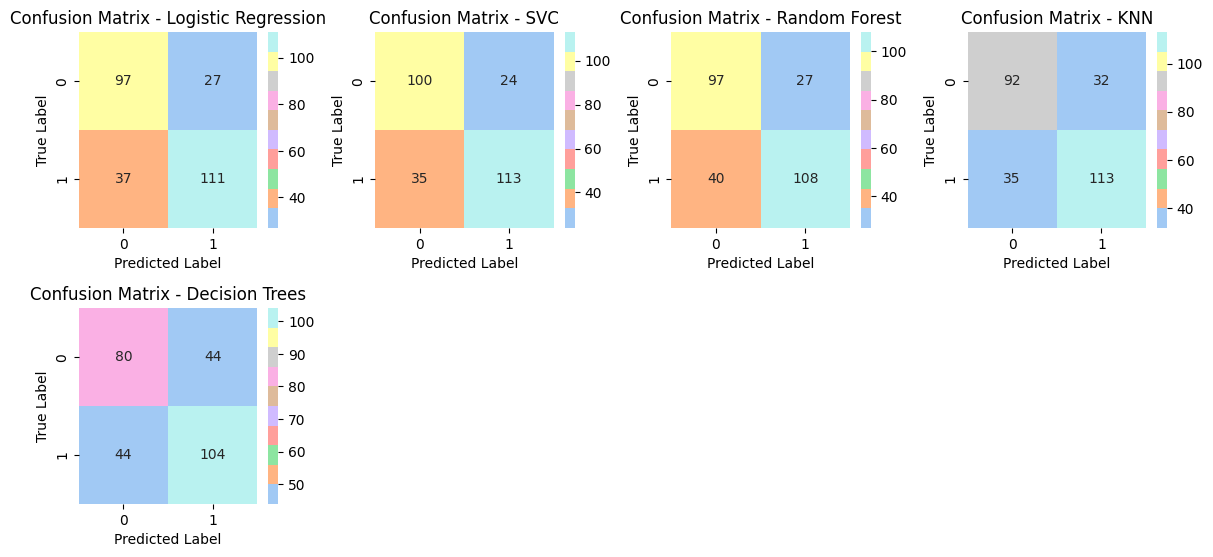

In [88]:
pastel_cmap = sns.color_palette("pastel", as_cmap=True)
confusion_matrices = []

# ... (model eğitimi ve tahminleri)

for preds, name in zip(predictions, model_names):
    matrix = confusion_matrix(y_test, preds)
    confusion_matrices.append((name, matrix))

# Plot confusion matrix heatmaps for each model
plt.figure(figsize=(12, 8))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(3, 4, i)
    plt.title(f'Confusion Matrix - {model_name}')
    sns.heatmap(cm, annot=True, fmt='d', cmap=pastel_cmap )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()